___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [4]:
pip install -U scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Setting the style of the seaborn
sns.set(style="whitegrid")

# Displaying all the columns of the dataframe
pd.pandas.set_option('display.max_columns', None)


#### Load Dataset

In [6]:
# Loading the dataset
df = pd.read_csv('Mall_Customers.csv')

# Displaying the first few rows of the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [7]:
# Renaming the columns to avoid future problems
df.rename(columns={
    'CustomerID': 'customer_id',
    'Gender': 'gender',
    'Age': 'age',
    'Annual Income (k$)': 'annual_income',
    'Spending Score (1-100)': 'spending_score'
}, inplace=True)

# Displaying the first few rows of the renamed dataframe
df.head()


,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [8]:
# Checking the structure of the data
df.info()

# Descriptive statistics of the data
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,customer_id,gender,age,annual_income,spending_score
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


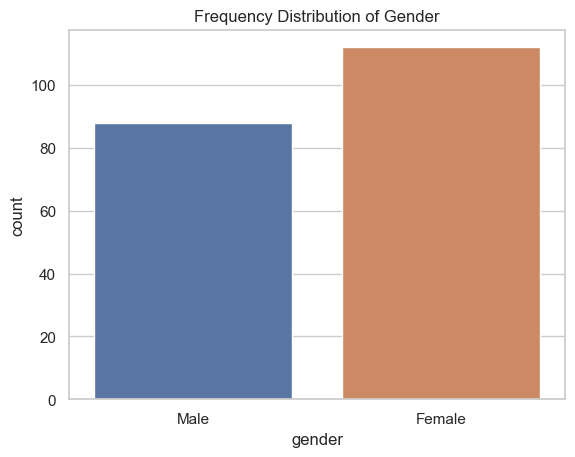

In [9]:
# Creating frequency distribution of gender
sns.countplot(x='gender', data=df)
plt.title('Frequency Distribution of Gender')
plt.show()

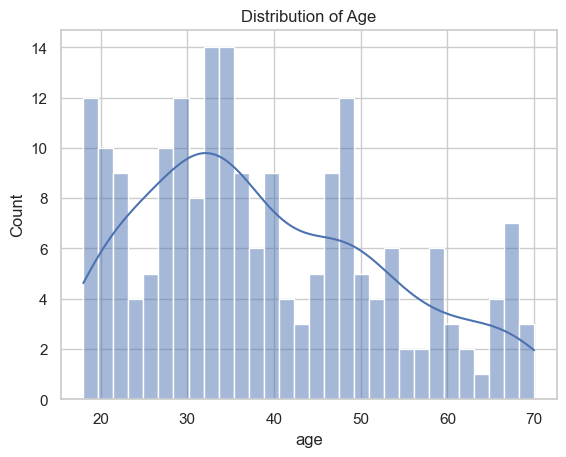

In [10]:
# Creating histogram of age
sns.histplot(data=df, x="age", bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

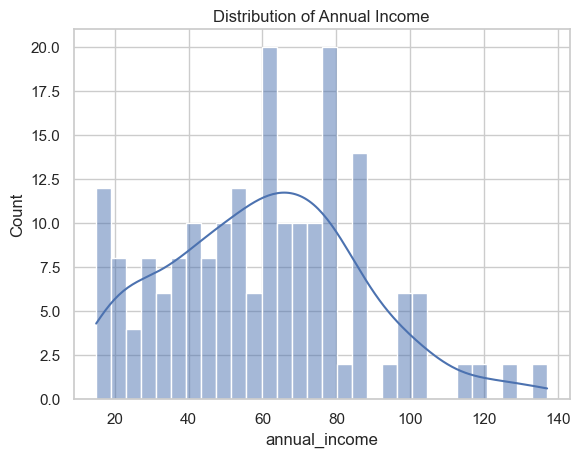

In [11]:
# Creating histogram of annual income
sns.histplot(data=df, x="annual_income", bins=30, kde=True)
plt.title('Distribution of Annual Income')
plt.show()

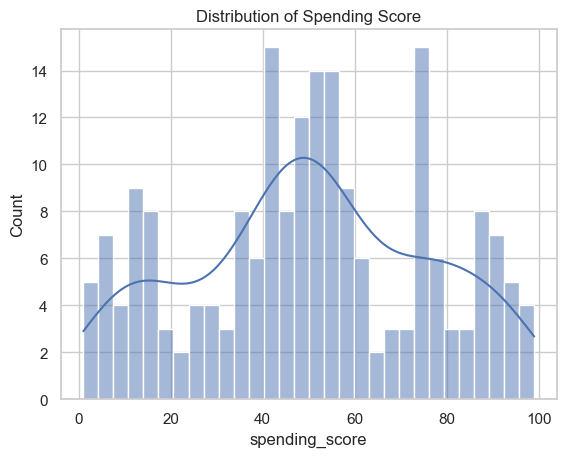

In [12]:
# Creating histogram of spending score
sns.histplot(data=df, x="spending_score", bins=30, kde=True)
plt.title('Distribution of Spending Score')
plt.show()

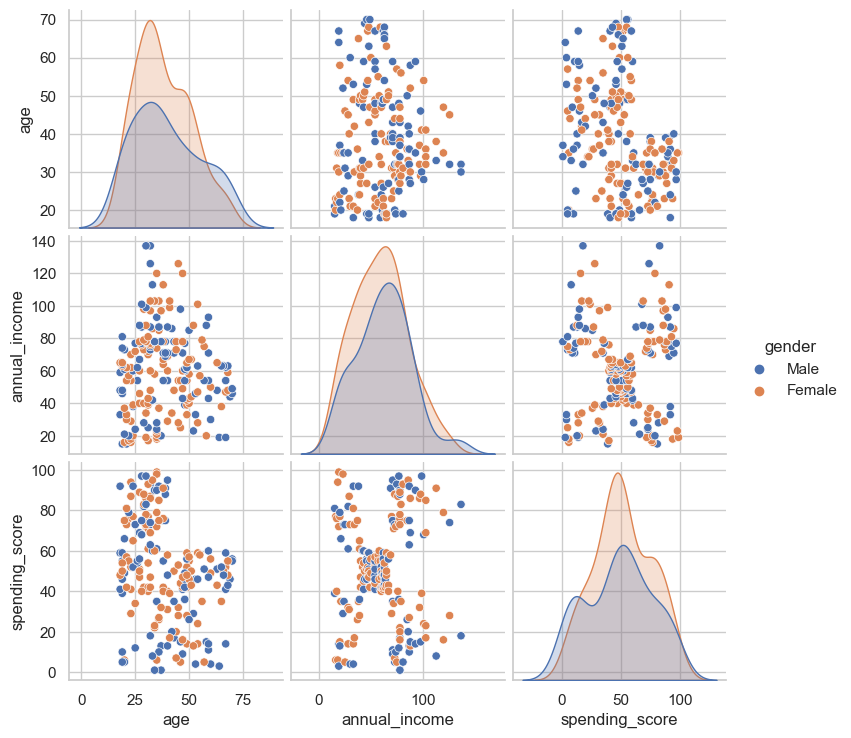

In [13]:
# Creating a pairplot of all variables
sns.pairplot(df.drop("customer_id", axis=1), hue="gender")
plt.show()

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [14]:
# Creating a new dataset with Age and Spending Score
df_age_spending = df[['age', 'spending_score']]

# Displaying the first few rows of the new dataframe
df_age_spending.head()

,age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


#### *ii. Determine optimal number of clusters*

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

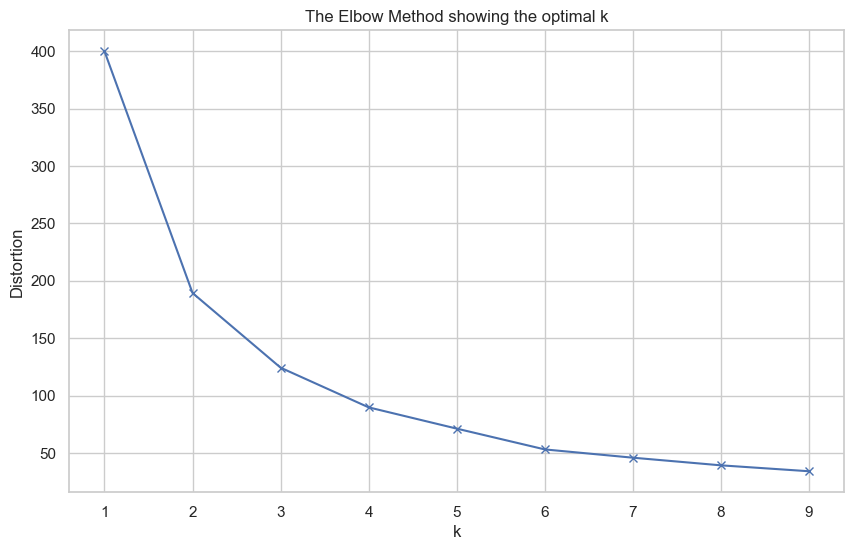

In [15]:
# Standardizing the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_age_spending)

# Determining the optimal number of clusters
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    distortions.append(kmeanModel.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [16]:
# The elbow point is a k=4.

### Why silhouette_score is negative?

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

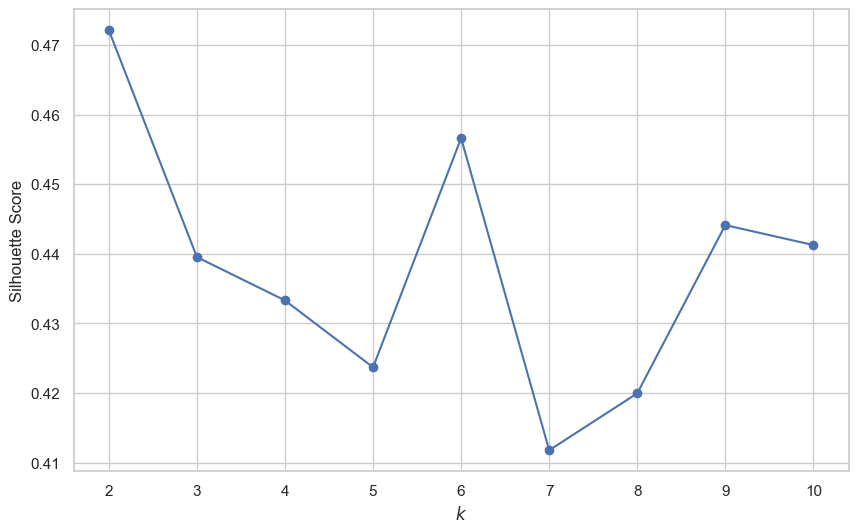

The optimal number of clusters with the maximum silhouette score of 0.47 is 2.


In [17]:
# Computing the silhouette scores for different numbers of clusters
silhouette_scores = [silhouette_score(df_scaled, KMeans(n_clusters=k).fit_predict(df_scaled)) for k in range(2, 11)]

# Plotting silhouette scores
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), silhouette_scores, "bo-")
plt.xticks(range(2, 11))
plt.xlabel("$k$")
plt.ylabel("Silhouette Score")
plt.show()

# Finding the optimal number of clusters with maximum silhouette score
k_opt = np.argmax(silhouette_scores) + 2  # Adding 2 because k starts from 2
print(f"The optimal number of clusters with the maximum silhouette score of {np.max(silhouette_scores):.2f} is {k_opt}.")


#### *iii. Apply K Means*

In [18]:
# Applying K Means with optimal number of clusters determined by Elbow Method
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df_scaled)

# Adding the predicted cluster labels to the original dataframe
df_age_spending['cluster_labels'] = kmeans.labels_

# Displaying the first few rows of the dataframe
df_age_spending.head()

/var/folders/l_/p07ypmtn78b712ssdj3n5zlm0000gn/T/ipykernel_63382/3723225742.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_spending['cluster_labels'] = kmeans.labels_


,age,spending_score,cluster_labels
0,19,39,3
1,21,81,0
2,20,6,3
3,23,77,0
4,31,40,3


#### *iv. Visualizing and Labeling All the Clusters*

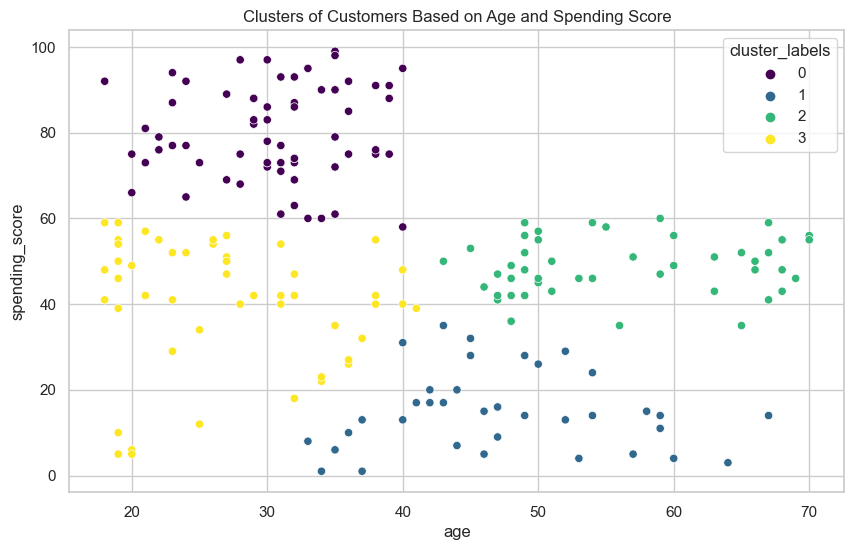

Cluster counts:
0    65
1    38
2    47
3    50
Name: cluster_labels, dtype: int64


/var/folders/l_/p07ypmtn78b712ssdj3n5zlm0000gn/T/ipykernel_63382/1956269838.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_spending['cluster_names'] = df_age_spending['cluster_labels'].map(cluster_labels)


,age,spending_score,cluster_labels,cluster_names
0,19,39,3,Older Low Spenders
1,21,81,0,Young High Spenders
2,20,6,3,Older Low Spenders
3,23,77,0,Young High Spenders
4,31,40,3,Older Low Spenders


In [19]:
# Visualizing the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='spending_score', hue='cluster_labels', palette='viridis', data=df_age_spending)
plt.title('Clusters of Customers Based on Age and Spending Score')
plt.show()

# Count of each cluster
cluster_counts = df_age_spending['cluster_labels'].value_counts().sort_index()
print(f"Cluster counts:\n{cluster_counts}")

# Labeling the clusters based on the visualization and count
# Note: This is subjective and can vary based on the interpretation
cluster_labels = {
    0: 'Young High Spenders',
    1: 'Older Average Spenders',
    2: 'Young Low Spenders',
    3: 'Older Low Spenders',
}

# Adding the labels to the dataframe
df_age_spending['cluster_names'] = df_age_spending['cluster_labels'].map(cluster_labels)

# Displaying the first few rows of the dataframe
df_age_spending.head()

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [20]:
# Creating a new dataset with Annual Income and Spending Score
df_income_spending = df[['annual_income', 'spending_score']]

# Displaying the first few rows of the new dataframe
df_income_spending.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#### *ii. Determine optimal number of clusters*

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

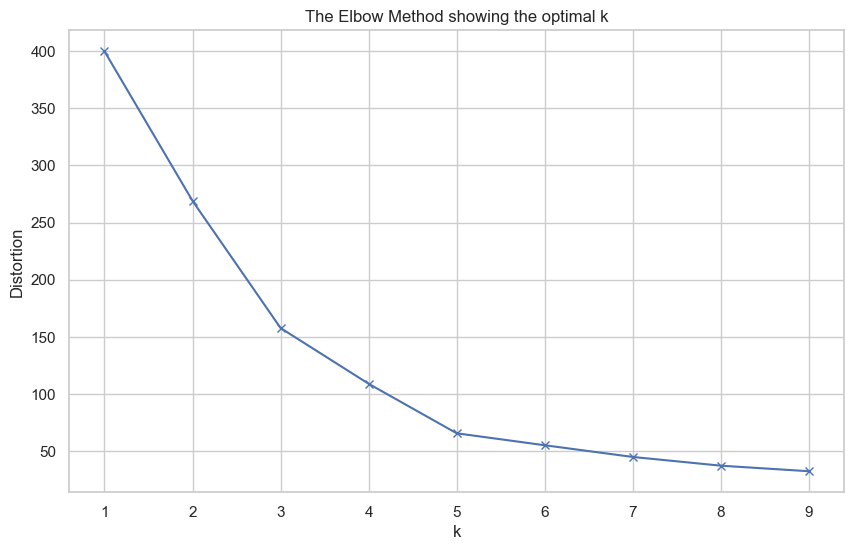

In [21]:
# Standardizing the features
df_scaled = scaler.fit_transform(df_income_spending)

# Determining the optimal number of clusters
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    distortions.append(kmeanModel.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [22]:
# k = 5 seems to be the best choice for this dataset;

#### *iii. Apply K Means*

In [23]:
# Applying K Means with optimal number of clusters determined by Elbow Method
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df_scaled)

# Adding the predicted cluster labels to the original dataframe
df_income_spending['cluster_labels'] = kmeans.labels_

# Displaying the first few rows of the dataframe
df_income_spending.head()

/var/folders/l_/p07ypmtn78b712ssdj3n5zlm0000gn/T/ipykernel_63382/2139001147.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income_spending['cluster_labels'] = kmeans.labels_


,annual_income,spending_score,cluster_labels
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3


#### *iv. Visualizing and Labeling All the Clusters*

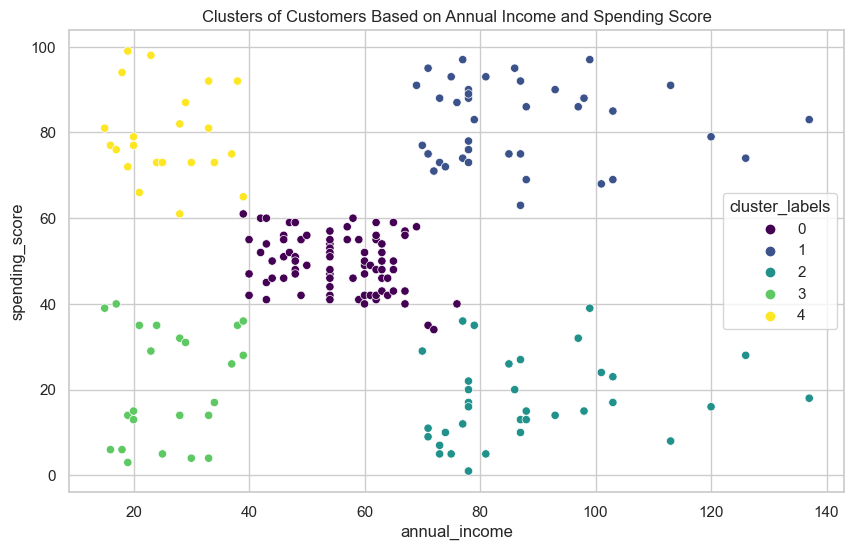

Cluster counts:
0    81
1    39
2    35
3    23
4    22
Name: cluster_labels, dtype: int64


/var/folders/l_/p07ypmtn78b712ssdj3n5zlm0000gn/T/ipykernel_63382/663650521.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income_spending['cluster_names'] = df_income_spending['cluster_labels'].map(cluster_labels)


,annual_income,spending_score,cluster_labels,cluster_names
0,15,39,3,"Low Income, High Spending"
1,15,81,4,"Low Income, Low Spending"
2,16,6,3,"Low Income, High Spending"
3,16,77,4,"Low Income, Low Spending"
4,17,40,3,"Low Income, High Spending"


In [24]:
# Visualizing the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='annual_income', y='spending_score', hue='cluster_labels', palette='viridis', data=df_income_spending)
plt.title('Clusters of Customers Based on Annual Income and Spending Score')
plt.show()

# Count of each cluster
cluster_counts = df_income_spending['cluster_labels'].value_counts().sort_index()
print(f"Cluster counts:\n{cluster_counts}")

# Labeling the clusters based on the visualization and count
# Note: This is subjective and can vary based on the interpretation
cluster_labels = {
    0: 'High Income, High Spending',
    1: 'Average Income, Average Spending',
    2: 'High Income, Low Spending',
    3: 'Low Income, High Spending',
    4: 'Low Income, Low Spending',
}

# Adding the labels to the dataframe
df_income_spending['cluster_names'] = df_income_spending['cluster_labels'].map(cluster_labels)

# Displaying the first few rows of the dataframe
df_income_spending.head()

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

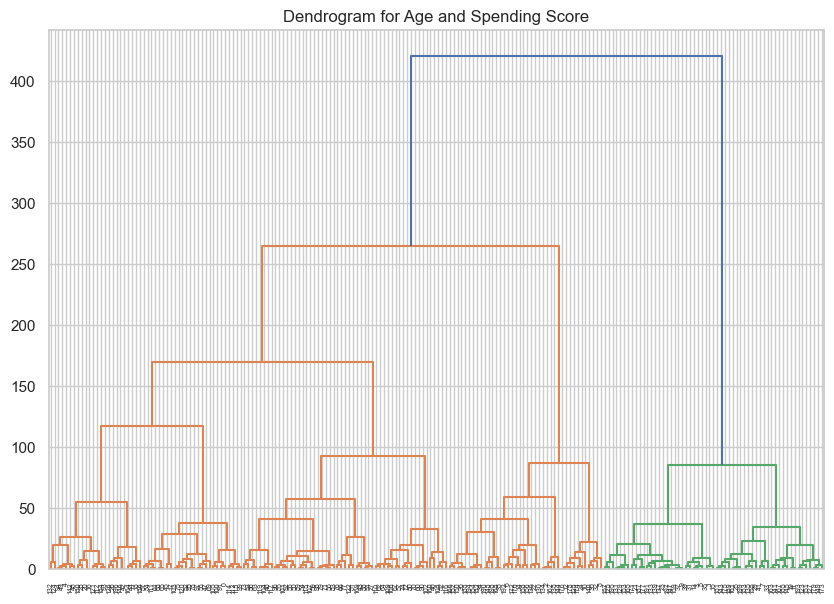

In [25]:
# Hierarchical clustering for 'age' and 'spending_score'
linked = linkage(df_age_spending.drop(['cluster_labels', 'cluster_names'], axis=1), 'ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Age and Spending Score')
plt.show()


## Clustering based on Annual Income and Spending Score- x2

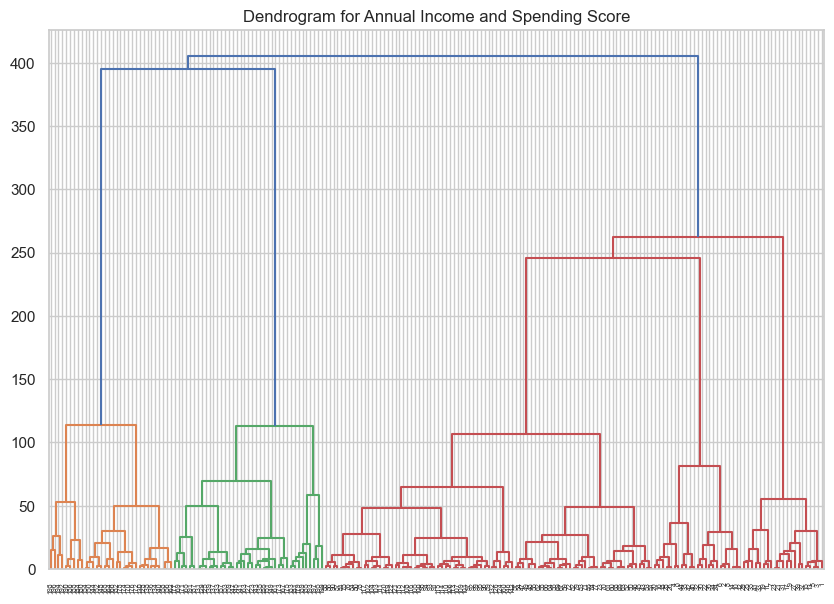

In [26]:
# Hierarchical clustering for 'annual_income' and 'spending_score'
linked = linkage(df_income_spending.drop(['cluster_labels', 'cluster_names'], axis=1), 'ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Annual Income and Spending Score')
plt.show()


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [27]:
# Applying Agglomerative Clustering with optimal number of clusters determined from the dendrogram
agg_clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agg_clustering.fit(df_scaled)

# Adding the predicted cluster labels to the original dataframe
df_age_spending['agg_cluster_labels'] = agg_clustering.labels_

# Displaying the first few rows of the dataframe
df_age_spending.head()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,age,spending_score,cluster_labels,cluster_names,agg_cluster_labels
0,19,39,3,Older Low Spenders,0
1,21,81,0,Young High Spenders,3
2,20,6,3,Older Low Spenders,0
3,23,77,0,Young High Spenders,3
4,31,40,3,Older Low Spenders,0


#### Annual Income and Spending Score- x2

In [28]:
# Applying Agglomerative Clustering with optimal number of clusters determined from the dendrogram
agg_clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg_clustering.fit(df_scaled)

# Adding the predicted cluster labels to the original dataframe
df_income_spending['agg_cluster_labels'] = agg_clustering.labels_

# Displaying the first few rows of the dataframe
df_income_spending.head()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,annual_income,spending_score,cluster_labels,cluster_names,agg_cluster_labels
0,15,39,3,"Low Income, High Spending",4
1,15,81,4,"Low Income, Low Spending",3
2,16,6,3,"Low Income, High Spending",4
3,16,77,4,"Low Income, Low Spending",3
4,17,40,3,"Low Income, High Spending",4


### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

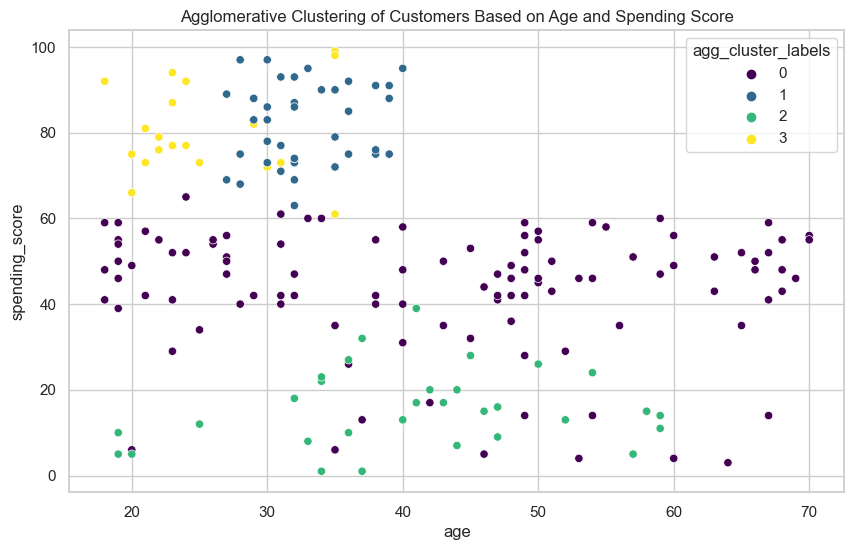

Agglomerative Cluster counts:
0    108
1     39
2     32
3     21
Name: agg_cluster_labels, dtype: int64


,age,spending_score,cluster_labels,cluster_names,agg_cluster_labels,agg_cluster_names
0,19,39,3,Older Low Spenders,0,Young Low Spenders
1,21,81,0,Young High Spenders,3,Young High Spenders
2,20,6,3,Older Low Spenders,0,Young Low Spenders
3,23,77,0,Young High Spenders,3,Young High Spenders
4,31,40,3,Older Low Spenders,0,Young Low Spenders


In [29]:
# Visualizing the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='spending_score', hue='agg_cluster_labels', palette='viridis', data=df_age_spending)
plt.title('Agglomerative Clustering of Customers Based on Age and Spending Score')
plt.show()

# Count of each cluster
cluster_counts = df_age_spending['agg_cluster_labels'].value_counts().sort_index()
print(f"Agglomerative Cluster counts:\n{cluster_counts}")

# Labeling the clusters based on the visualization and count
# Note: This is subjective and can vary based on the interpretation
agg_cluster_labels = {
    0: 'Young Low Spenders',
    1: 'Older Average Spenders',
    2: 'Older Low Spenders',
    3: 'Young High Spenders',
}

# Adding the labels to the dataframe
df_age_spending['agg_cluster_names'] = df_age_spending['agg_cluster_labels'].map(agg_cluster_labels)

# Displaying the first few rows of the dataframe
df_age_spending.head()

#### Annual Income and Spending Score- x2

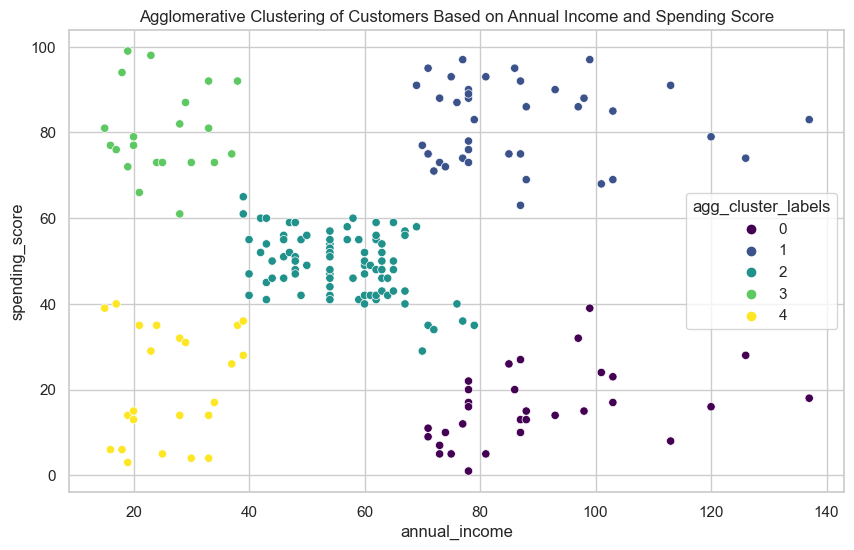

Agglomerative Cluster counts:
0    32
1    39
2    85
3    21
4    23
Name: agg_cluster_labels, dtype: int64


,annual_income,spending_score,cluster_labels,cluster_names,agg_cluster_labels,agg_cluster_names
0,15,39,3,"Low Income, High Spending",4,"Low Income, Low Spending"
1,15,81,4,"Low Income, Low Spending",3,"Low Income, High Spending"
2,16,6,3,"Low Income, High Spending",4,"Low Income, Low Spending"
3,16,77,4,"Low Income, Low Spending",3,"Low Income, High Spending"
4,17,40,3,"Low Income, High Spending",4,"Low Income, Low Spending"


In [30]:
# Visualizing the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='annual_income', y='spending_score', hue='agg_cluster_labels', palette='viridis', data=df_income_spending)
plt.title('Agglomerative Clustering of Customers Based on Annual Income and Spending Score')
plt.show()

# Count of each cluster
cluster_counts = df_income_spending['agg_cluster_labels'].value_counts().sort_index()
print(f"Agglomerative Cluster counts:\n{cluster_counts}")

# Labeling the clusters based on the visualization and count
# Note: This is subjective and can vary based on the interpretation
agg_cluster_labels = {
    0: 'Average Income, Average Spending',
    1: 'High Income, High Spending',
    2: 'High Income, Low Spending',
    3: 'Low Income, High Spending',
    4: 'Low Income, Low Spending',
}

# Adding the labels to the dataframe
df_income_spending['agg_cluster_names'] = df_income_spending['agg_cluster_labels'].map(agg_cluster_labels)

# Displaying the first few rows of the dataframe
df_income_spending.head()

#### Interpretation based on Age and Spending Score- x1

In [31]:
df_age_spending.head()

,age,spending_score,cluster_labels,cluster_names,agg_cluster_labels,agg_cluster_names
0,19,39,3,Older Low Spenders,0,Young Low Spenders
1,21,81,0,Young High Spenders,3,Young High Spenders
2,20,6,3,Older Low Spenders,0,Young Low Spenders
3,23,77,0,Young High Spenders,3,Young High Spenders
4,31,40,3,Older Low Spenders,0,Young Low Spenders


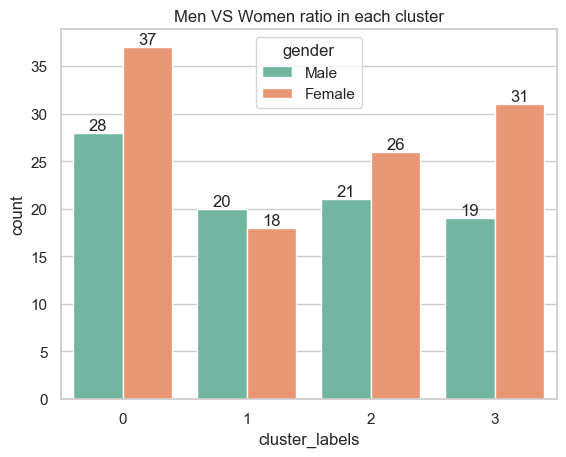

In [40]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax = sns.countplot(x=df_age_spending.cluster_labels, hue=df.gender, palette="Set2")
for p in ax.containers:
    ax.bar_label(p)
# We count clusters according to gender.

/var/folders/l_/p07ypmtn78b712ssdj3n5zlm0000gn/T/ipykernel_63382/1139830539.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax = df_age_spending.groupby("cluster_labels").mean().plot(kind='bar',


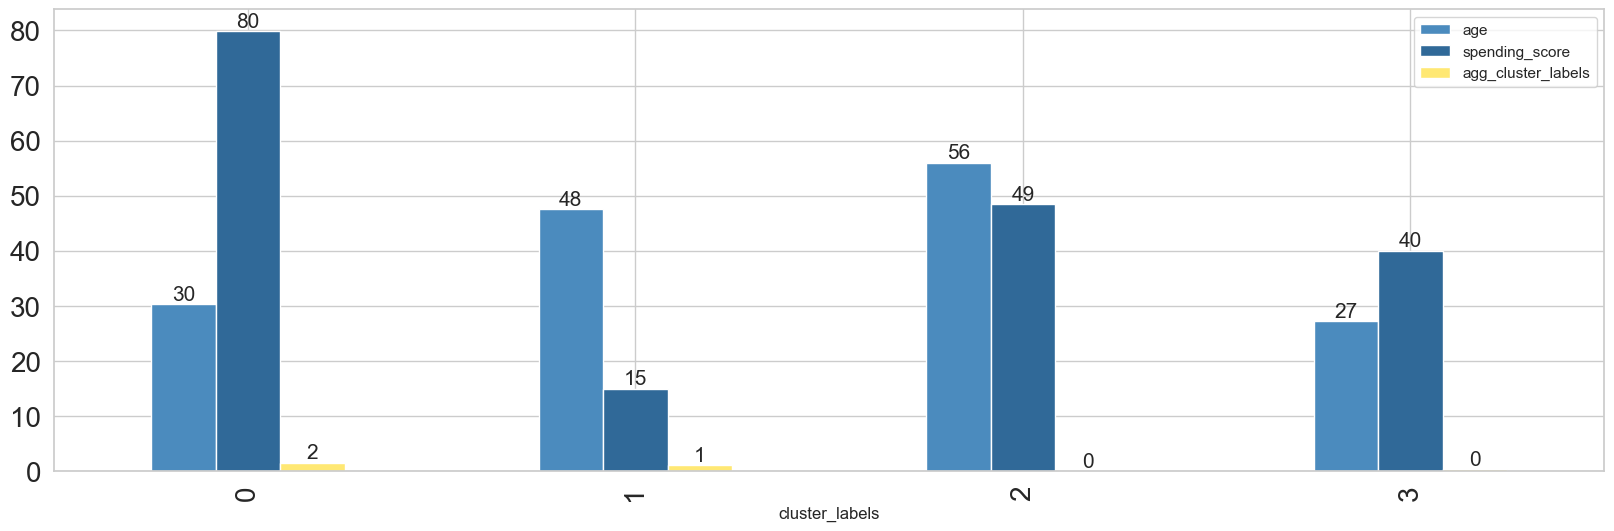

In [39]:
ax = df_age_spending.groupby("cluster_labels").mean().plot(kind='bar',
                                                          figsize=(20, 6),
                                                          fontsize=20,
                                                          color=['#4B8BBE', '#306998', '#FFE873', '#FFD43B'])
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=15)

# Note that we are using df.groupby("cluster_Age_Spending_Score").mean().

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [41]:
df_income_spending.head()

,annual_income,spending_score,cluster_labels,cluster_names,agg_cluster_labels,agg_cluster_names
0,15,39,3,"Low Income, High Spending",4,"Low Income, Low Spending"
1,15,81,4,"Low Income, Low Spending",3,"Low Income, High Spending"
2,16,6,3,"Low Income, High Spending",4,"Low Income, Low Spending"
3,16,77,4,"Low Income, Low Spending",3,"Low Income, High Spending"
4,17,40,3,"Low Income, High Spending",4,"Low Income, Low Spending"


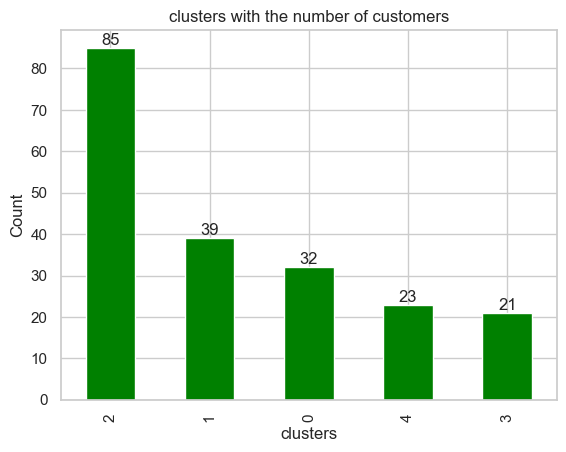

In [48]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df_income_spending.agg_cluster_labels.value_counts().plot(kind='bar', color="green")
ax.bar_label(ax.containers[0]);

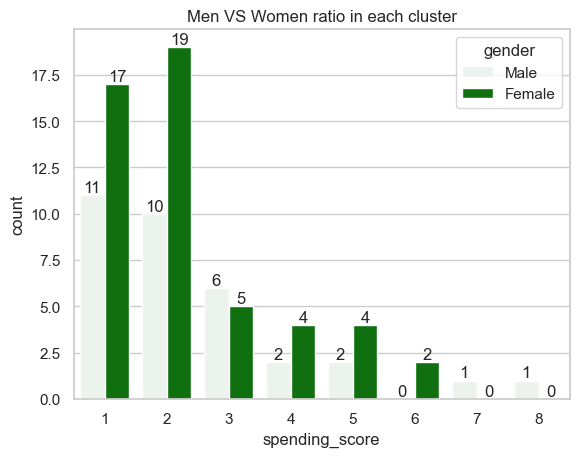

In [58]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df_income_spending.spending_score.value_counts(), hue=df.gender, color="green")
for p in ax.containers:
    ax.bar_label(p)

/var/folders/l_/p07ypmtn78b712ssdj3n5zlm0000gn/T/ipykernel_63382/4280411366.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = df_income_spending.groupby("cluster_labels").mean()


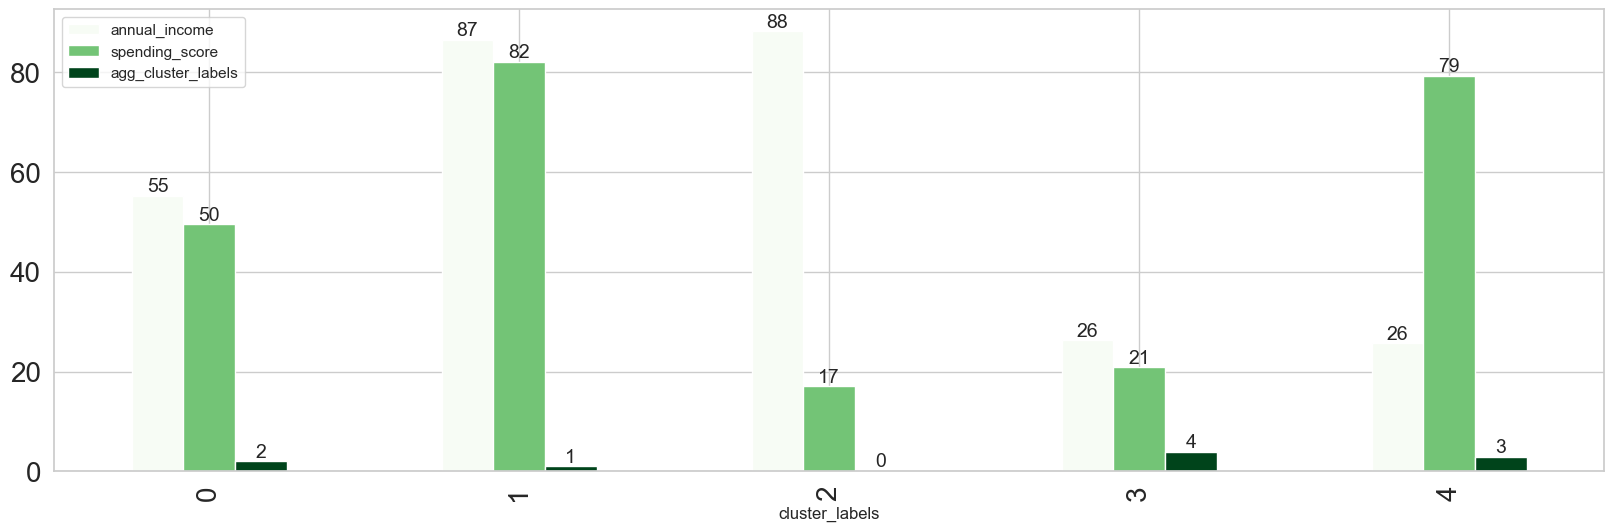

In [64]:
# Group data by cluster_labels and calculate the mean
grouped_df = df_income_spending.groupby("cluster_labels").mean()

# Set up plot parameters
plot_params = {
    'kind': 'bar', 
    'figsize': (20, 6), 
    'fontsize': 20,
    'colormap': 'Greens'  # Specify colormap here
}

# Create the bar plot
ax = grouped_df.plot(**plot_params)

# Loop through each container in the plot and add the bar label
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)


## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___